# Creating Customer Segments

In this project you, will analyze a dataset containing annual spending amounts for internal structure, to understand the variation in the different types of customers that a wholesale distributor interacts with.

Instructions:

- Run each code block below by pressing **Shift+Enter**, making sure to implement any steps marked with a TODO.
- Answer each question in the space provided by editing the blocks labeled "Answer:".
- When you are done, submit the completed notebook (.ipynb) with all code blocks executed, as well as a .pdf version (File > Download as).

In [1]:
# Import libraries: NumPy, pandas, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Tell iPython to include plots inline in the notebook
%matplotlib inline

# Read dataset
data = pd.read_csv("wholesale-customers.csv")
print "Dataset has {} rows, {} columns".format(*data.shape)
print data.head()  # print the first 5 rows

Dataset has 440 rows, 6 columns
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185


##Feature Transformation

**1)** In this section you will be using PCA and ICA to start to understand the structure of the data. Before doing any computations, what do you think will show up in your computations? List one or two ideas for what might show up as the first PCA dimensions, or what type of vectors will show up as ICA dimensions.

Answer: My guess is that 'Fresh' and 'Detergents_papers' would be a potential candidates for the first PCA dimensions since they presumably have bigger variance and can differentaite between different customer segments better.

###PCA

In [2]:
# TODO: Apply PCA with the same number of dimensions as variables in the dataset
from sklearn.decomposition import PCA
pca = PCA(n_components = 6)
pca.fit(data)

# Print the components and the amount of variance in the data contained in each dimension
print pca.components_
print pca.explained_variance_ratio_

[[-0.97653685 -0.12118407 -0.06154039 -0.15236462  0.00705417 -0.06810471]
 [-0.11061386  0.51580216  0.76460638 -0.01872345  0.36535076  0.05707921]
 [-0.17855726  0.50988675 -0.27578088  0.71420037 -0.20440987  0.28321747]
 [-0.04187648 -0.64564047  0.37546049  0.64629232  0.14938013 -0.02039579]
 [ 0.015986    0.20323566 -0.1602915   0.22018612  0.20793016 -0.91707659]
 [-0.01576316  0.03349187  0.41093894 -0.01328898 -0.87128428 -0.26541687]]
[ 0.45961362  0.40517227  0.07003008  0.04402344  0.01502212  0.00613848]


**2)** How quickly does the variance drop off by dimension? If you were to use PCA on this dataset, how many dimensions would you choose for your analysis? Why?

Answer: As observed in pca.explained_variance_ratio_, the variance significantly drops by ~83% when we go from second to third PC. Therefore, I would pick 2 PCs for the analysis.

**3)** What do the dimensions seem to represent? How can you use this information?

Answer: Looking at the first and second rows of pca.components_ and their most significant coefficients, it seems that the first PC mainly focuses on 'Fresh', while the second PC focuses on 'Grocery', 'Milk', and 'Detergents_Paper' in that order.

###ICA

In [3]:
# TODO: Fit an ICA model to the data
# Note: Adjust the data to have center at the origin first!
from sklearn.decomposition import FastICA
ica = FastICA(n_components = 6)
origin_centered_data = data - data.mean()
ica.fit(origin_centered_data)

# Print the independent components
print ica.components_

[[  2.72430649e-07  -2.60971849e-06  -1.14554811e-05   1.49586580e-06
    2.79896145e-05   5.73154668e-06]
 [  1.95234426e-07  -1.85465413e-06   7.34885311e-06   2.90613968e-07
   -2.85846586e-06  -1.79892405e-06]
 [ -1.71165987e-07  -9.77108368e-06   5.92476479e-06   3.35869751e-07
   -3.80463916e-06   5.96612253e-06]
 [  3.97823700e-06  -9.04426071e-07  -7.36922549e-07  -6.66250356e-07
    2.33497370e-06  -9.61057965e-07]
 [  8.63398235e-07   1.43518152e-07  -7.79913780e-07  -1.11471404e-05
    5.44000812e-07   5.95181888e-06]
 [  3.87476495e-07   2.30196475e-07   5.87362472e-07   5.21815800e-07
   -5.12517469e-07  -1.80965459e-05]]


**4)** For each vector in the ICA decomposition, write a sentence or two explaining what sort of object or property it corresponds to. What could these components be used for?

Answer: 

1st vector: mainly corresponds to the 6th feature ('Delicatessen')

2nd vector: mainly corresponds to 1st and 6th feature ('Fresh' and 'Delicatessen')

3rd vector: mainly corresponds to 3rd and 5th feature ('Grocery' and 'Detergents_Paper')

4th vector: mainly focuses on 2nd, 3rd, 5th, and 6th features. 

5th vector: mainly corresponds to fourth feature ('Frozen')

6th vector: mainly focuses on 2nd, 3rd, 5th, and 6th features. 

##Clustering

In this section you will choose either K Means clustering or Gaussian Mixed Models clustering, which implements expectation-maximization. Then you will sample elements from the clusters to understand their significance.

###Choose a Cluster Type

**5)** What are the advantages of using K Means clustering or Gaussian Mixture Models?

Answer: 
Advantages of K Means clustering: 
- hard assignment
- quickly converges to local optima
- does not make any assumptions on the Gaussian-ness of underlying data

Advantages of GMM: 
- soft assignment
- it will not bias the clusters to have specific structures

**6)** Below is some starter code to help you visualize some cluster data. The visualization is based on [this demo](http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_digits.html) from the sklearn documentation.

In [4]:
# Import clustering modules
from sklearn.cluster import KMeans
from sklearn.mixture import GMM

In [5]:
# TODO: First we reduce the data to two dimensions using PCA to capture variation
pca_2 = PCA(n_components = 2)
pca_2.fit(data)
reduced_data = pca_2.transform(data)
# print pca.components_[:1]
# print data.loc[0]
# print type(ndarray(data.loc[0]))
# print type(pca.components_[:1])
print reduced_data[:10]  # print upto 10 elements

[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]
 [  2765.96159271   -959.87072713]
 [   715.55089221  -2013.00226567]
 [  4474.58366697   1429.49697204]
 [  6712.09539718  -2205.90915598]
 [  4823.63435407  13480.55920489]]


In [6]:
# TODO: Implement your clustering algorithm here, and fit it to the reduced data for visualization
# The visualizer below assumes your clustering object is named 'clusters'
clusters = KMeans(n_clusters=3, random_state=1)
clusters.fit(reduced_data)
# print clusters.labels_
print clusters

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=1, tol=0.0001,
    verbose=0)


In [7]:
# Plot the decision boundary by building a mesh grid to populate a graph.
x_min, x_max = reduced_data[:, 0].min() - 1, reduced_data[:, 0].max() + 1
y_min, y_max = reduced_data[:, 1].min() - 1, reduced_data[:, 1].max() + 1
hx = (x_max-x_min)/1000.
hy = (y_max-y_min)/1000.
xx, yy = np.meshgrid(np.arange(x_min, x_max, hx), np.arange(y_min, y_max, hy))

# Obtain labels for each point in mesh. Use last trained model.
Z = clusters.predict(np.c_[xx.ravel(), yy.ravel()])

In [8]:
# TODO: Find the centroids for KMeans or the cluster means for GMM 

centroids = clusters.cluster_centers_
print centroids

[[  4114.95375632  -3081.03219608]
 [  1339.44615464  25546.49074629]
 [-24220.71188261  -4364.45560022]]


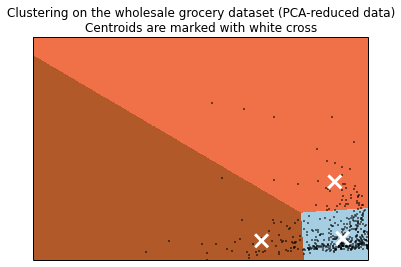

x_min: -103864, x_max: 13020,  y_min: -14004, y_max: 99227
   Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicatessen
0  12669  9656     7561     214              2674          1338
1   7057  9810     9568    1762              3293          1776
2   6353  8808     7684    2405              3516          7844
3  13265  1196     4221    6404               507          1788
4  22615  5410     7198    3915              1777          5185
[[  -650.02212207   1585.51909007]
 [  4426.80497937   4042.45150884]
 [  4841.9987068    2578.762176  ]
 [  -990.34643689  -6279.80599663]
 [-10657.99873116  -2159.72581518]]
[0 0 0 0 2]


In [9]:
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1)
plt.clf()
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()),
           cmap=plt.cm.Paired,
           aspect='auto', origin='lower')

plt.plot(reduced_data[:, 0], reduced_data[:, 1], 'k.', markersize=2)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='w', zorder=10)
plt.title('Clustering on the wholesale grocery dataset (PCA-reduced data)\n'
          'Centroids are marked with white cross')
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()

print "x_min: %d, x_max: %d,  y_min: %d, y_max: %d" % (x_min, x_max, y_min, y_max)
print data[:5]
print reduced_data[:5]
print clusters.labels_[:5]


**7)** What are the central objects in each cluster? Describe them as customers.

Answer: 

Using n=3 for number of clusters, the resulting centroids in the reduced space will be 

Centroid 1: [4114.95375632  -3081.03219608] 

Centroid 2: [  1339.44615464  25546.49074629]

Centroid 3: [-24220.71188261  -4364.45560022]

With PC1 focusing mainly on 'Fresh' (in revese, because the first coefficient is negative), and PC2 positively correlated with 'Grocery', 'Milk', and 'Detergent_Papers' in that order.

Cluster 1 (blue), having the biggest population, can be described as customers who, relatively speaking, have less 'Fresh' and also less 'Grocery, Milk, and Detergents_Paper' in their annual basket. 

Cluster 2 (red), can be described as customers who, relatively speaking, have less 'Fresh' but more of 'Grocery, Milk, and Detergents_Paper' in their annual basket. 

Cluster 3 (brown), can be described as customers who, relatively speaking, have much more 'Fresh' but less of 'Grocery, Milk, and Detergents_Paper' in their annual basket. 

###Conclusions

** 8)** Which of these techniques did you feel gave you the most insight into the data?

Answer: PCA was very helpful in bringing out the major factors in which customers could be differentiated

**9)** How would you use that technique to help the company design new experiments?

Answer: We can expand the feature set to measure customers across additional dimensions and then do PCA to understand the intircate customer segments

**10)** How would you use that data to help you predict future customer needs?

Answer: By knowing the different customer clusters, each potentially with different set of needs, the business can better tailor its services to individual customer segments without necessarily lumping them all to the same group and regarding their needs as one.